In [1]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
import random
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib as mpl

In [4]:
TaxH_unsup_PnCGCN_embedding = pd.read_pickle('./Embeddings/TaxH_unsup_embeddings.pickle')
TaxZ_unsup_PnCGCN_embedding = pd.read_pickle('./Embeddings/TaxZ_unsup_embeddings.pickle')
TaxS_unsup_PnCGCN_embedding = pd.read_pickle('./Embeddings/TaxS_unsup_embeddings.pickle')

In [24]:
TaxH_label = pd.read_pickle('Label/TaxH_label.pickle')
TaxZ_label = pd.read_pickle('Label/TaxZ_label.pickle')
TaxS_label = pd.read_pickle('Label/TaxS_label.pickle')

In [10]:
# 河北的正负样本
TaxH_positive_label = TaxH_label[TaxH_label['label']==1]
TaxH_negative_label = TaxH_label[TaxH_label['label']==0]
print('TaxH positive', TaxH_positive_label.shape)
print('TaxH negative', TaxH_negative_label.shape)
# 浙江的正负样本
TaxZ_positive_label = TaxZ_label[TaxZ_label['label']==1]
TaxZ_negative_label = TaxZ_label[TaxZ_label['label']==0]
print('TaxZ positive', TaxZ_positive_label.shape)
print('TaxZ negative', TaxZ_negative_label.shape)
# 上海的正负样本
TaxS_positive_label = TaxS_label[TaxS_label['label']==1]
TaxS_negative_label = TaxS_label[TaxS_label['label']==0]
print('TaxS positive', TaxS_positive_label.shape)
print('TaxS negative', TaxS_negative_label.shape)

TaxH positive (28131, 1)
TaxH negative (57660, 1)
TaxZ positive (20455, 1)
TaxZ negative (45690, 1)
TaxS positive (43042, 1)
TaxS negative (107747, 1)


In [32]:
TaxH_positive_nsr = TaxH_positive_label.index.values
TaxH_negative_nsr = TaxH_negative_label.index.values
TaxH_positive_idx = np.random.choice(TaxH_positive_nsr, 1000, replace=False)
TaxH_negative_idx = np.random.choice(TaxH_negative_nsr, 1000, replace=False)
TaxH_data_ = pd.concat([TaxH_unsup_PnCGCN_embedding.loc[TaxH_positive_idx], TaxH_unsup_PnCGCN_embedding.loc[TaxH_negative_idx]], axis=0)
TaxH_label_ = pd.concat([TaxH_label.loc[TaxH_positive_idx], TaxH_label.loc[TaxH_negative_idx]], axis=0)
TaxH_label_[TaxH_label_['label']==1]= '#00CED1'
TaxH_label_[TaxH_label_['label']==0]= '#DC143C'


In [34]:
TaxZ_positive_nsr = TaxZ_positive_label.index.values
TaxZ_negative_nsr = TaxZ_negative_label.index.values
TaxZ_positive_idx = np.random.choice(TaxZ_positive_nsr, 1000, replace=False)
TaxZ_negative_idx = np.random.choice(TaxZ_negative_nsr, 1000, replace=False)
TaxZ_data_ = pd.concat([TaxZ_unsup_PnCGCN_embedding.loc[TaxZ_positive_idx], TaxZ_unsup_PnCGCN_embedding.loc[TaxZ_negative_idx]], axis=0)
TaxZ_label_ = pd.concat([TaxZ_label.loc[TaxZ_positive_idx], TaxZ_label.loc[TaxZ_negative_idx]], axis=0)
TaxZ_label_[TaxZ_label_['label']==1]= '#00CED1'
TaxZ_label_[TaxZ_label_['label']==0]= '#DC143C'

In [35]:
TaxS_positive_nsr = TaxS_positive_label.index.values
TaxS_negative_nsr = TaxS_negative_label.index.values
TaxS_positive_idx = np.random.choice(TaxS_positive_nsr, 1000, replace=False)
TaxS_negative_idx = np.random.choice(TaxS_negative_nsr, 1000, replace=False)
TaxS_data_ = pd.concat([TaxS_unsup_PnCGCN_embedding.loc[TaxS_positive_idx], TaxS_unsup_PnCGCN_embedding.loc[TaxS_negative_idx]], axis=0)
TaxS_label_ = pd.concat([TaxS_label.loc[TaxS_positive_idx], TaxS_label.loc[TaxS_negative_idx]], axis=0)
TaxS_label_[TaxS_label_['label']==1]= '#00CED1'
TaxS_label_[TaxS_label_['label']==0]= '#DC143C'

In [30]:
def plot_tsne(tsne_sample, label_):
    fig, ax = plt.subplots(1, 1)
    # ax.scatter(x2_sample[:, 0], x2_sample[:, 1], c=label.values, s=1, cmap=plt.get_cmap('tab20'))
    ax.scatter(tsne_sample[:, 0], tsne_sample[:, 1], c=label_.values.flatten(), s=10, cmap=plt.get_cmap('tab20'))
    # ax.set_xlim(-100, 100)
    # ax.set_ylim(-100, 100)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    # plt.savefig(DIR + NAME + 'Basic.pdf')
    plt.show()

In [29]:
ts = time.time()
TaxH_sample = TSNE(n_components=2).fit_transform(TaxH_data_.values)
TaxZ_sample = TSNE(n_components=2).fit_transform(TaxZ_data_.values)
TaxS_sample = TSNE(n_components=2).fit_transform(TaxS_data_.values)
te = time.time()
print('tsne 用时 {:.3f} s'.format(te-ts))

tsne 用时 6.013 s


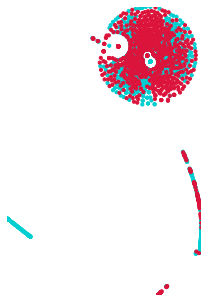

In [33]:
plot_tsne(TaxH_sample, TaxH_label_, name='TaxH')